## 1.필요한 라이브러리 임포트

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

## 2.사진 불러오기

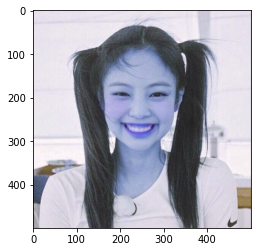

In [34]:
my_image_path = os.getcwd()+'/jennie_image.jfif'

img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (500, 500))    
img_show = img_bgr.copy()      # 출력용 이미지 별도 보관

plt.imshow(img_bgr)
plt.grid(False)
plt.show()

## 3. 얼굴 검출

In [35]:
detector_hog = dlib.get_frontal_face_detector()

In [36]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(159, 139) (345, 325)]]


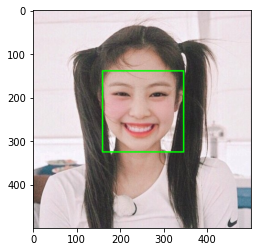

In [37]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top() 
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 녹색으로

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.grid(False)
plt.show()

## 4.얼굴 랜드마크 검출

In [38]:
# 얼굴 랜드마크를 찾아주는 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [39]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


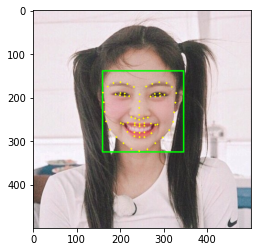

In [40]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.grid(False)
plt.show()

## 5. 스티커 적용하기

In [41]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # left eye bottom index : 40
    x = landmark[40][0] 
    y = landmark[40][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(243, 240)
(x,y) : (210,197)
(w,h) : (187,187)


(187, 187, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

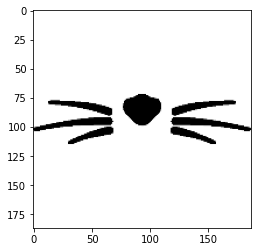

In [42]:
# 스티커 이미지 불러오기

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show

In [43]:
# 스티커 위치 조정하기

refined_x = x - w // 3 # left
refined_y = y - h // 3 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (148,135)


In [44]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0

In [45]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

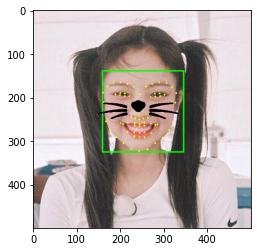

In [46]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

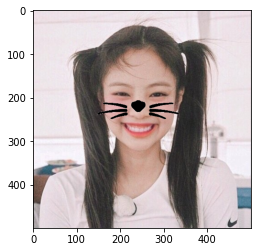

In [48]:
# 박스와 점 제거 후 출력

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()